# Enhancing Traffic Management Efficiency: Unveiling Insights from I-94 Heavy Traffic Data

### About the Project
The project focuses on analyzing a dataset related to westbound traffic on the I-94 Interstate highway. The main objective is to gain insights into heavy traffic patterns and identify key indicators that contribute to such congestion. By exploring factors such as weather conditions, time of day, and day of the week, we aim to understand the underlying patterns and relationships in the data.

Through the application of exploratory data visualization techniques learned in the course, including line plots, scatter plots, bar plots, histograms, and grid charts, we can visually represent and analyze the dataset. By examining these visualizations, we can uncover meaningful patterns and correlations that can help us identify when and why heavy traffic occurs on the I-94.

The ultimate goal of this project is to derive valuable insights from the data, which could potentially inform decisions related to traffic management, infrastructure planning, or even provide useful information for travelers looking to optimize their commute on the I-94.



### Goal of the Project

The objective of this project is to analyze a dataset on westbound traffic on the I-94 Interstate highway and identify indicators of heavy traffic. By examining factors such as weather conditions, time of day, and day of the week, we aim to uncover patterns and insights that contribute to congestion on the highway. The analysis seeks to answer important questions about when heavy traffic is more likely to occur, which weather conditions are associated with increased congestion, and if specific days or times experience higher traffic volume.

To achieve this goal, we will employ various data visualization techniques, including line plots, scatter plots, bar plots, histograms, and grid charts, to gain a comprehensive understanding of the factors that influence heavy traffic on the I-94. By visualizing and exploring the data, we can extract valuable insights that have the potential to inform traffic management strategies, aid in infrastructure planning, and provide practical information for commuters seeking to optimize their travel routes and schedules.

Ultimately, the purpose of this project is to uncover meaningful information from the dataset, shedding light on traffic patterns and assisting in making informed decisions related to traffic management and transportation planning. The findings can contribute to improved traffic flow, more efficient infrastructure design, and enhanced commuting experiences for individuals using the I-94 Interstate highway.

In [1]:
import pandas as pd
metro = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")
metro.head(5)
metro.tail(5)
metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


# Analyzing Traffic Volume

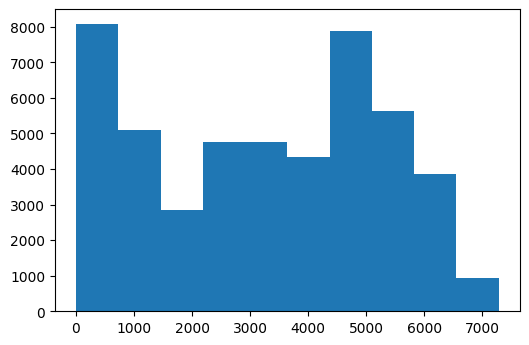

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(metro["traffic_volume"])

plt.plot()
plt.show()

metro["traffic_volume"].describe()

### Key Statistics of Traffic Volume
Based on the data, the average traffic volume is around 3259.82 vehicles with a variation of approximately 1986.86 vehicles. The range of traffic volume spans from 0 to 7280 vehicles. The majority of observations fall between 1193 and 4933 vehicles, as indicated by the 25th and 75th percentiles.

Further investigation is needed to analyze how daytime and nighttime affect traffic volume. Comparing the traffic volumes during the 7 AM to 6 PM daytime period with the 7 PM to 6 AM nighttime period would be helpful. By studying and visualizing the data for these time frames, we can identify any discernible disparities in traffic patterns. This analysis will yield valuable insights into how the time of day specifically influences traffic volume on the I-94 Interstate highway.

# Traffic Volume: Day vs. Night

In [3]:
# Convert the date_time column to datetime format
metro['date_time'] = pd.to_datetime(metro['date_time'])

# Create a copy of the metro DataFrame
metro_copy = metro.copy()

# Extract the hour from the 'date_time' column
metro_copy['hour'] = metro_copy['date_time'].dt.hour

# Isolate the daytime data using .loc
daytime_data = metro_copy.loc[(metro_copy['hour'] >= 7) & (metro_copy['hour'] < 19), :].copy()

# Isolate the nighttime data using .loc
nighttime_data = metro_copy.loc[(metro_copy['hour'] < 7) | (metro_copy['hour'] >= 19), :].copy()

### Traffic Volume and Segmenting Data by Daytime and Nighttime
The code aims to perform an analysis and manipulation of traffic volume data. It begins by converting the 'date_time' column to datetime format using the pd.to_datetime() function, enabling accurate handling of dates and times. Subsequently, the 'hour' component is extracted from the 'date_time' column using the dt.hour property and stored in a new column called 'hour'. This allows for more precise analysis based on the hour of the day.

Following this, the code filters the DataFrame to isolate the daytime data, selecting records between 7 AM and 6 PM, by employing the condition (metro['hour'] >= 7) & (metro['hour'] < 19). Similarly, the nighttime data is isolated using the condition (metro['hour'] < 7) | (metro['hour'] >= 19), capturing records between 7 PM and 6 AM. These operations produce subsets of data that can be further examined to uncover valuable insights regarding traffic patterns during distinct periods of the day.

# Traffic Volume: Day vs. Night (II)

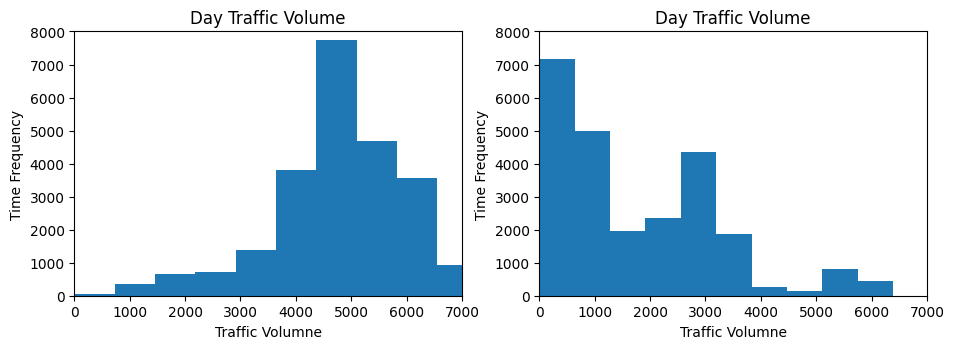

In [4]:
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
plt.hist(daytime_data["traffic_volume"])
plt.title("Day Traffic Volume")
plt.xlabel("Traffic Volumne")
plt.ylabel("Time Frequency")
plt.xlim(0, 7000)
plt.ylim(0, 8000)


plt.subplot(1, 2, 2)
plt.hist(nighttime_data["traffic_volume"])
plt.title("Night Traffic Volume")
plt.xlabel("Traffic Volumne")
plt.ylabel("Time Frequency")
plt.xlim(0, 7000)
plt.ylim(0, 8000)
nighttime_data["traffic_volume"].describe()

plt.show()

In [5]:
daytime_data["traffic_volume"].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

##### Daytime Data Analysis:

- Histogram Shape: The histogram of the daytime traffic volume exhibits a relatively symmetric shape. This suggests that the distribution of traffic volume during the day is balanced, with no significant skewness towards higher or lower values.

- Peak and Mean: The peak of the distribution is centered around the mean value. This indicates that the majority of traffic volume during the day is concentrated around the average value. It suggests that there is a consistent level of traffic volume that is frequently observed.

- Spread of Traffic: The distribution shows a gradual decrease in frequency as we move away from the mean. This implies that the traffic volume is spread out across a range of values, rather than being concentrated at specific extremes. It indicates that there is a variety of traffic volume levels observed during the daytime.

- Concentration of Traffic: The relatively balanced distribution suggests that there is a significant amount of traffic during the day. The traffic volume is not heavily skewed towards either very high or very low values, indicating a consistent flow of vehicles throughout the day.

Based on this analysis, we can conclude that the daytime data represents a substantial amount of traffic with a balanced distribution of volume. Focusing on the daytime data would be appropriate for identifying indicators of heavy traffic during this period.

In [6]:
nighttime_data["traffic_volume"].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

##### Nighttime Data Analysis"
- Histogram Shape: The histogram of the nighttime traffic volume exhibits a similar shape to the daytime data, but with a lower overall frequency. This suggests that the distribution of traffic volume during the night is also somewhat balanced, like the daytime data.

- Skewness: The nighttime traffic volume histogram appears to be slightly right-skewed. This means that the distribution has a longer tail on the right side, indicating that there are occasional instances of higher traffic volume during the nighttime period.

- Lower Frequency: The lower overall frequency of the nighttime data histogram indicates that the traffic volume during this period is generally lighter compared to the daytime. This implies that there are fewer instances of high traffic volume during the night.

In summary, the nighttime data shows a distribution of traffic volume that is generally lighter compared to the daytime. The histogram's lower overall frequency suggests that heavy traffic conditions are less common during the nighttime period. The slightly right-skewed shape indicates that there may still be occasional instances of higher traffic volume during the night, but they are not as prevalent as during the daytime.

Based on this analysis, if the goal is to find indicators of heavy traffic, it would be more appropriate to focus on the daytime data. However, studying the nighttime data can still provide insights into nighttime traffic patterns and identify factors that contribute to occasional instances of higher traffic volume during those hours.






# Time Indicators

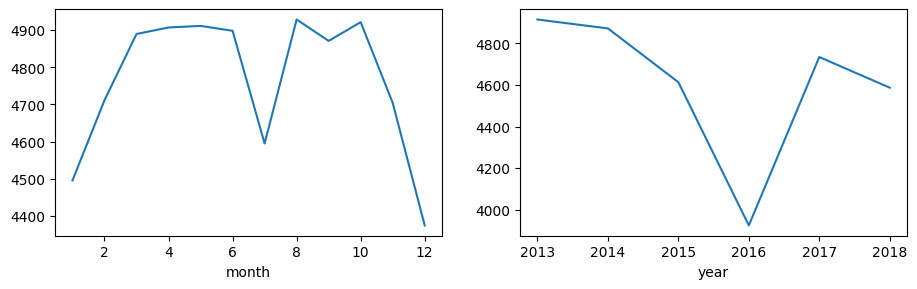

In [31]:
plt.figure(figsize=(11,3))

plt.subplot(1, 2, 1)
daytime_data['month'] = daytime_data['date_time'].dt.month
by_month = daytime_data.groupby('month').mean()
by_month['traffic_volume']
by_month['traffic_volume'].plot.line()
by_month['traffic_volume'].describe()

plt.subplot(1, 2, 2)
daytime_data['year'] = daytime_data['date_time'].dt.year
only_july = daytime_data[daytime_data['month'] == 7]
only_july.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()

The line plot graph provides insights into the traffic volume patterns throughout the year. It shows that traffic tends to be lighter during the colder months of November to February and more intense during the warmer months from March to October. However, July stands out as an interesting exception to this trend. In July, despite being a warm month, the traffic volume appears to be significantly lower compared to the surrounding months.

This observation raises the question of whether there is something special about July that causes traffic to be consistently less heavy during this time each year. To explore this further, we can analyze the traffic volume specifically for the month of July across different years. By examining the data for July in each year, we can determine if there is a consistent pattern of lower traffic volume during this month compared to other months.


# Time Indicators (II)

count       7.000000
mean     4761.958037
std       764.684759
min      3436.541789
25%      4410.400422
50%      5189.004782
75%      5288.027555
max      5311.303730
Name: traffic_volume, dtype: float64

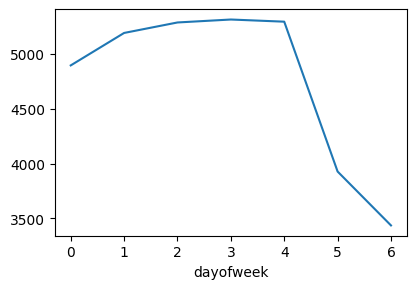

In [29]:
plt.figure(figsize=(10,3))

plt.subplot(1, 2, 1)
daytime_data['dayofweek'] = daytime_data['date_time'].dt.dayofweek
by_dayofweek = daytime_data.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday
by_dayofweek['traffic_volume'].plot.line()
by_dayofweek['traffic_volume'].describe()


##### Day of the week analysis:
The analysis of the given traffic volume data indicates an approximate average of 4762 cars, accompanied by a significant variation denoted by a standard deviation of approximately 765. The findings suggest a substantial disparity in traffic volume between weekdays and weekends. On weekdays, the traffic volume surpasses 5000 cars, whereas on weekends, it remains comparatively lighter, with values below 4000 cars. The observed range of recorded traffic volume extends from approximately 3437 cars to 5311 cars.

# Time Indicators (III)


hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


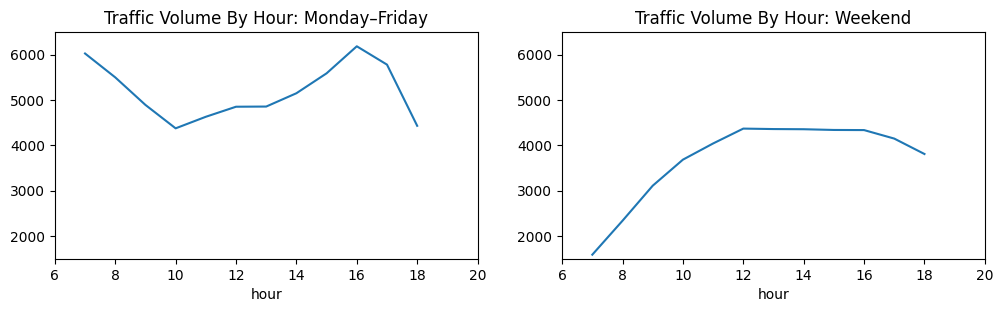

In [33]:
daytime_data['hour'] = daytime_data['date_time'].dt.hour
bussiness_days = daytime_data.copy()[daytime_data['dayofweek'] <= 4] # 4 == Friday
weekend = daytime_data.copy()[daytime_data['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])




plt.figure(figsize=(12,3))

plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Monday–Friday')

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Weekend')

plt.show()

#### Analysis of Traffic Volume by Hour: Business Days vs. Weekends
we can observe the following patterns in the traffic volume:

Traffic volume during business days (Monday-Friday) tends to be higher compared to weekends. The line plot for business days shows a clear peak during rush hours at around 7 and 16, with traffic volume exceeding 6,000 cars. This corresponds to the times when people typically commute to and from work.

On weekends, the traffic volume remains relatively lower throughout the day compared to business days. The line plot for weekends displays a smoother pattern with lower values, ranging from around 1,600 to 4,000 cars.

Overall, these findings highlight the time-related indicators of heavy traffic. They indicate that traffic is generally heavier during warm months, on business days, and during peak commuting hours. The provided line plots effectively visualize these patterns and provide insights into the traffic volume fluctuations throughout the day on both business days and weekends.

# Weather Indicators

In [34]:
daytime_data.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
hour              0.172704
month            -0.022337
dayofweek        -0.416453
year             -0.003557
Name: traffic_volume, dtype: float64

Based on the provided correlation values, none of the numerical weather columns show strong correlations with the "traffic_volume" column. The "hour" column has the highest correlation coefficient (0.172704), indicating a weak positive relationship with traffic volume. Additionally, the "dayofweek" column exhibits a stronger negative correlation (-0.416453), suggesting that certain days of the week may have lower traffic volume. However, these correlations are not particularly strong, and other factors beyond weather likely contribute to heavy traffic. Therefore, it is difficult to conclude that any of these weather columns serve as reliable indicators for heavy traffic without considering additional factors and analysis.

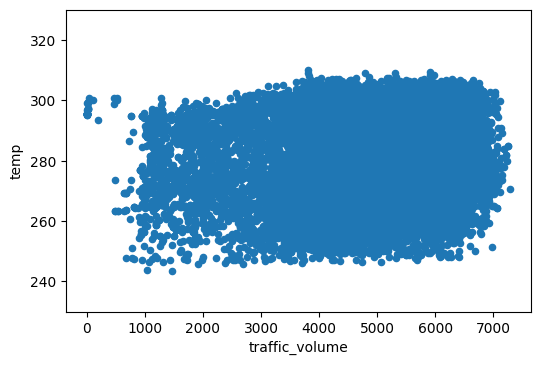

In [39]:
daytime_data.plot.scatter('traffic_volume', 'temp')
plt.ylim(230, 330) # two wrong 0K temperatures mess up the y-axis
plt.show()

# Weather Types

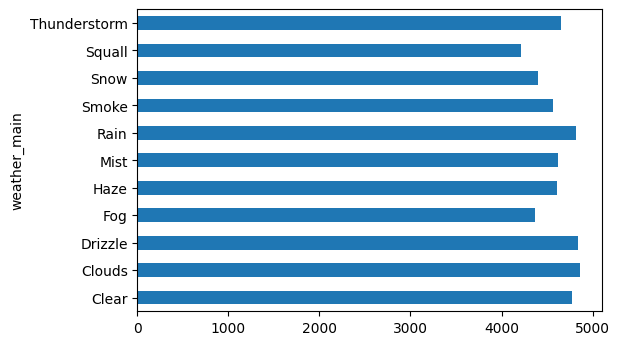

In [43]:
by_weather_main = daytime_data.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()
daytime_data['weather_main'].describe()
plt.show()

In this barh graph, groups the data in the "day" DataFrame by the "weather_main" column and calculates the mean values for each weather type. Subsequently, it generates a horizontal bar plot to visualize the average "traffic_volume" for each weather category.

From the bar plot, it is evident that no weather type exhibits a traffic volume exceeding 5,000 cars. This observation indicates the difficulty in finding a dependable indicator for heavy traffic based solely on weather conditions. To delve into a more detailed weather classification, grouping the data by the "weather_description" column is suggested. This column offers more specific information regarding weather conditions, which may aid in identifying potential indicators for heavy traffic.

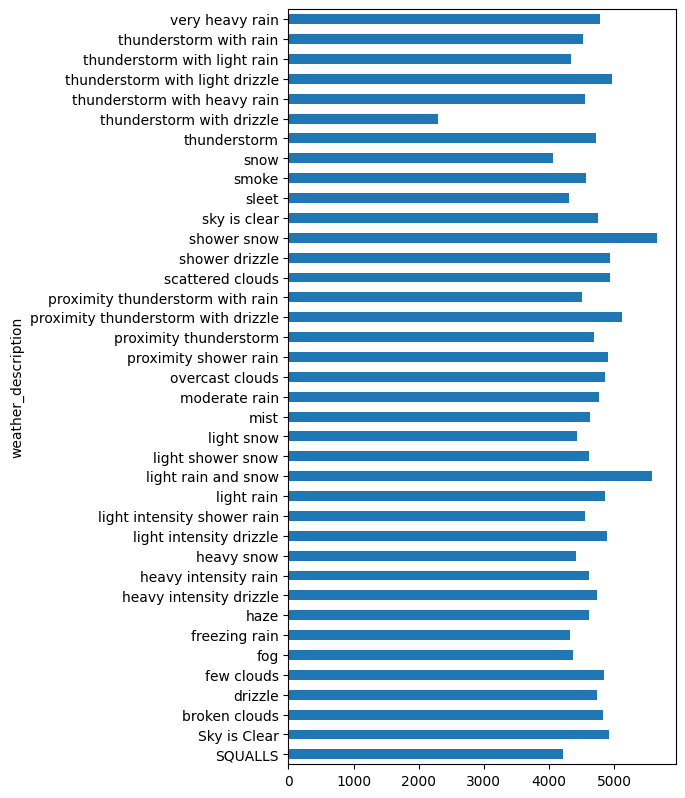

In [45]:
by_weather_description = daytime_data.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.show()

#### Analysis of Weather Types and Traffic Volume: Surprising Patterns and Potential Influencing Factors
Upon analyzing the provided table, it is evident that there are three weather types in which the traffic volume exceeds 5,000 cars. These weather types are "Shower snow," "Light rain and snow," and "Proximity thunderstorm with drizzle."

Interestingly, it is not immediately apparent why these weather types exhibit higher average traffic volumes. Although these weather conditions can be considered unfavorable, they are not exceptionally severe. One possible explanation could be that during such weather conditions, more individuals choose to use their cars instead of opting for alternative modes of transportation like biking or walking. This behavior might arise from a preference for the convenience and protection offered by automobiles during inclement weather. Further analysis and contextual factors are necessary to better understand the underlying reasons behind these traffic patterns.

# Conclusions

Throughout this project, our objective was to identify indicators of heavy traffic on the I-94 Interstate highway. Our analysis has revealed two significant types of indicators: time indicators and weather indicators.

Regarding time indicators, we discovered that traffic tends to be heavier during the warmer months, specifically from March to October, compared to the colder months from November to February. Additionally, we found that traffic is generally heavier on business days in contrast to weekends. During business days, the peak traffic hours occur around 7 AM and 4 PM, corresponding to the morning and evening rush hours.

Regarding weather indicators, we identified specific weather conditions that coincide with heavy traffic. Two types of weather conditions stood out: "Shower snow" and "Light rain and snow." Surprisingly, these weather types were associated with higher traffic volumes despite not being considered extremely severe. Additionally, the weather condition "Proximity thunderstorm with drizzle" also correlated with increased traffic.

In conclusion, this project has successfully identified indicators of heavy traffic on the I-94 Interstate highway. The time indicators revealed the influence of seasons, weekdays, and specific rush hours on traffic volume. Moreover, the weather indicators highlighted the unexpected relationship between moderate weather conditions, such as shower snow and light rain and snow, and higher traffic volumes.

By understanding these indicators, transportation authorities and commuters can better anticipate and plan for heavy traffic situations, implementing strategies to mitigate congestion and improve overall traffic flow on the I-94 highway.






